In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.model_selection import validation_curve, cross_val_score
from scipy import stats

In [2]:
df=pd.read_csv('Airsat21.csv') 
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

In [4]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8793.000000
mean,64909.453421,39.349824,1198.719732,2.732668,3.034835,2.754908,2.966186,3.202996,3.245092,3.404176,3.328946,3.361171,3.348009,3.615228,3.285260,3.625780,3.261092,14.811755,15.229728
std,37363.570738,15.125359,1002.278467,1.326181,1.523991,1.401340,1.281167,1.338942,1.348517,1.326445,1.339770,1.290675,1.311099,1.189311,1.272855,1.180865,1.318718,38.643242,39.026924
min,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32450.000000,27.000000,411.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,64666.000000,40.000000,853.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97335.000000,51.000000,1750.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
df.shape

(8813, 24)

In [7]:
df.Gender.value_counts()

Gender
Female    4495
Male      4318
Name: count, dtype: int64

In [8]:
df.Customer_Type.value_counts()

Customer_Type
Loyal Customer       7237
disloyal Customer    1576
Name: count, dtype: int64

In [9]:
df.Type_of_Travel.value_counts()

Type_of_Travel
Business travel    6121
Personal Travel    2692
Name: count, dtype: int64

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


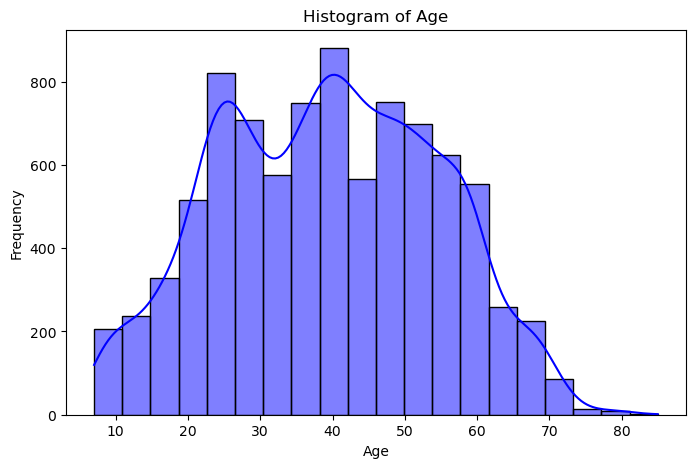

In [10]:
plt.figure(figsize=(8,5)) # univariate histogram
sns.histplot(df['Age'], bins=20, kde=True, color='b')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()  # Shows age group of travellers

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


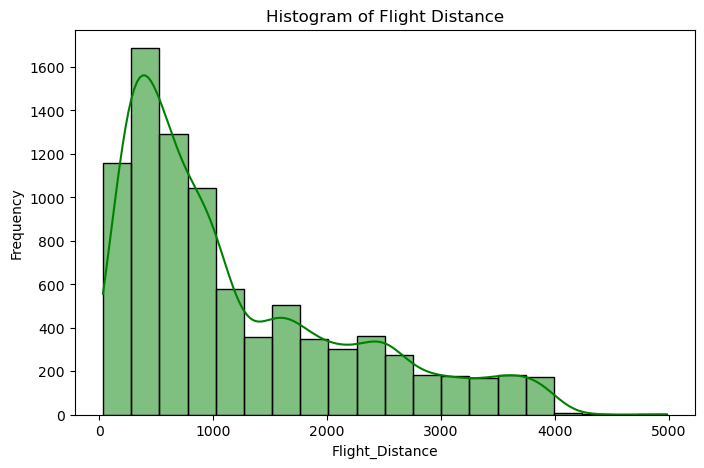

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Flight_Distance'], bins=20, kde=True, color='g')
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight_Distance')
plt.ylabel('Frequency')
plt.show()

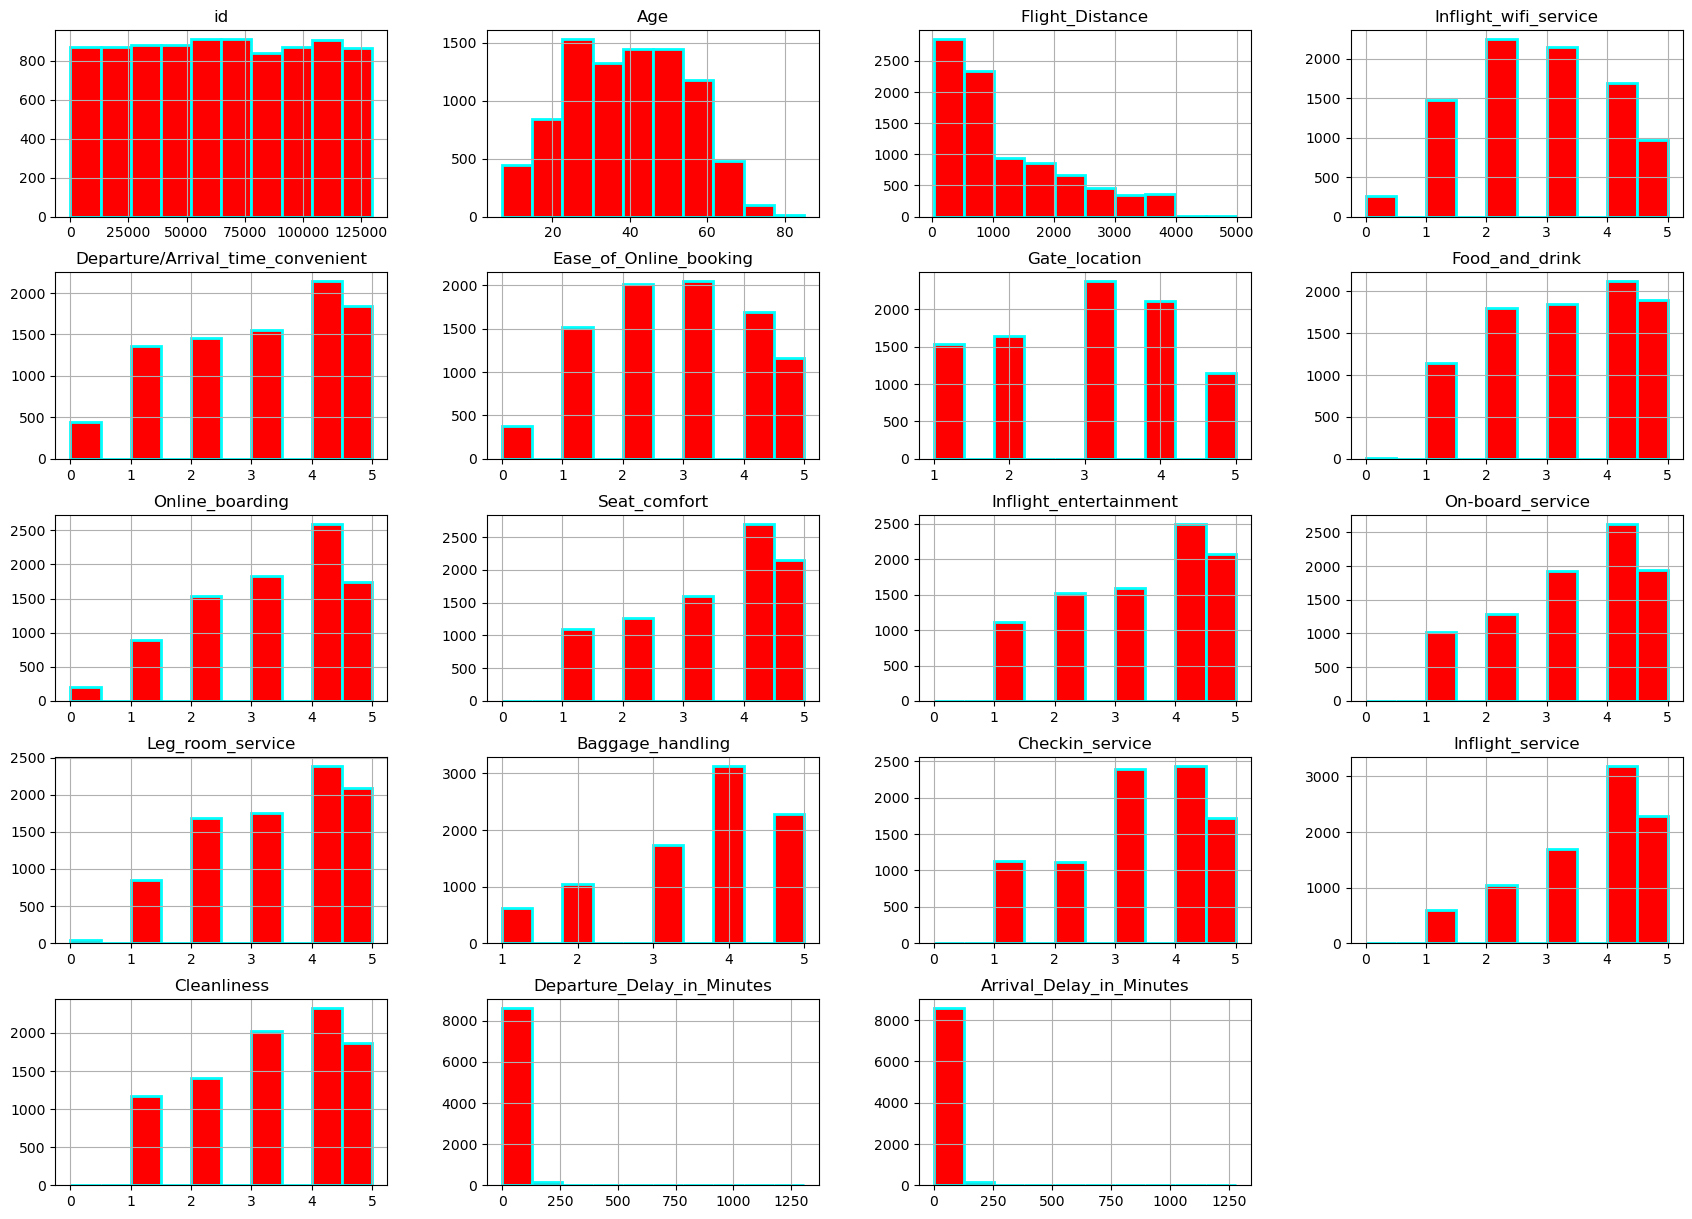

In [12]:
df.hist(edgecolor='cyan',linewidth=2, color='r') # histograms for the data available in the dataset
fig=plt.gcf()
fig.set_size_inches(21,15)
plt.show()

Text(0.5, 1.0, 'Type of Travel Distribution')

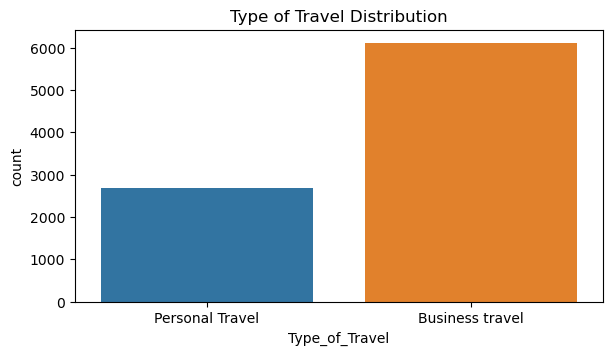

In [13]:
# Explore the distribution of categorical variables
plt.figure(figsize=(15, 12))

# Example for 'Type_of_Travel'
plt.subplot(3, 2, 1)
sns.countplot(x='Type_of_Travel', data=df)
plt.title('Type of Travel Distribution')

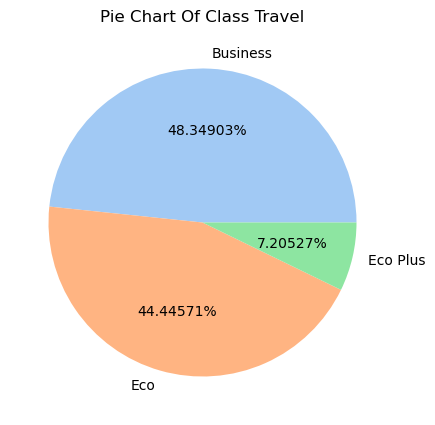

In [14]:
# pie chart
plt.figure(figsize=(8,5))
df['Class'].value_counts().plot(kind='pie',autopct='%1.5f%%',colors=sns.color_palette('pastel'))
plt.title('Pie Chart Of Class Travel')
plt.ylabel('')
plt.show()

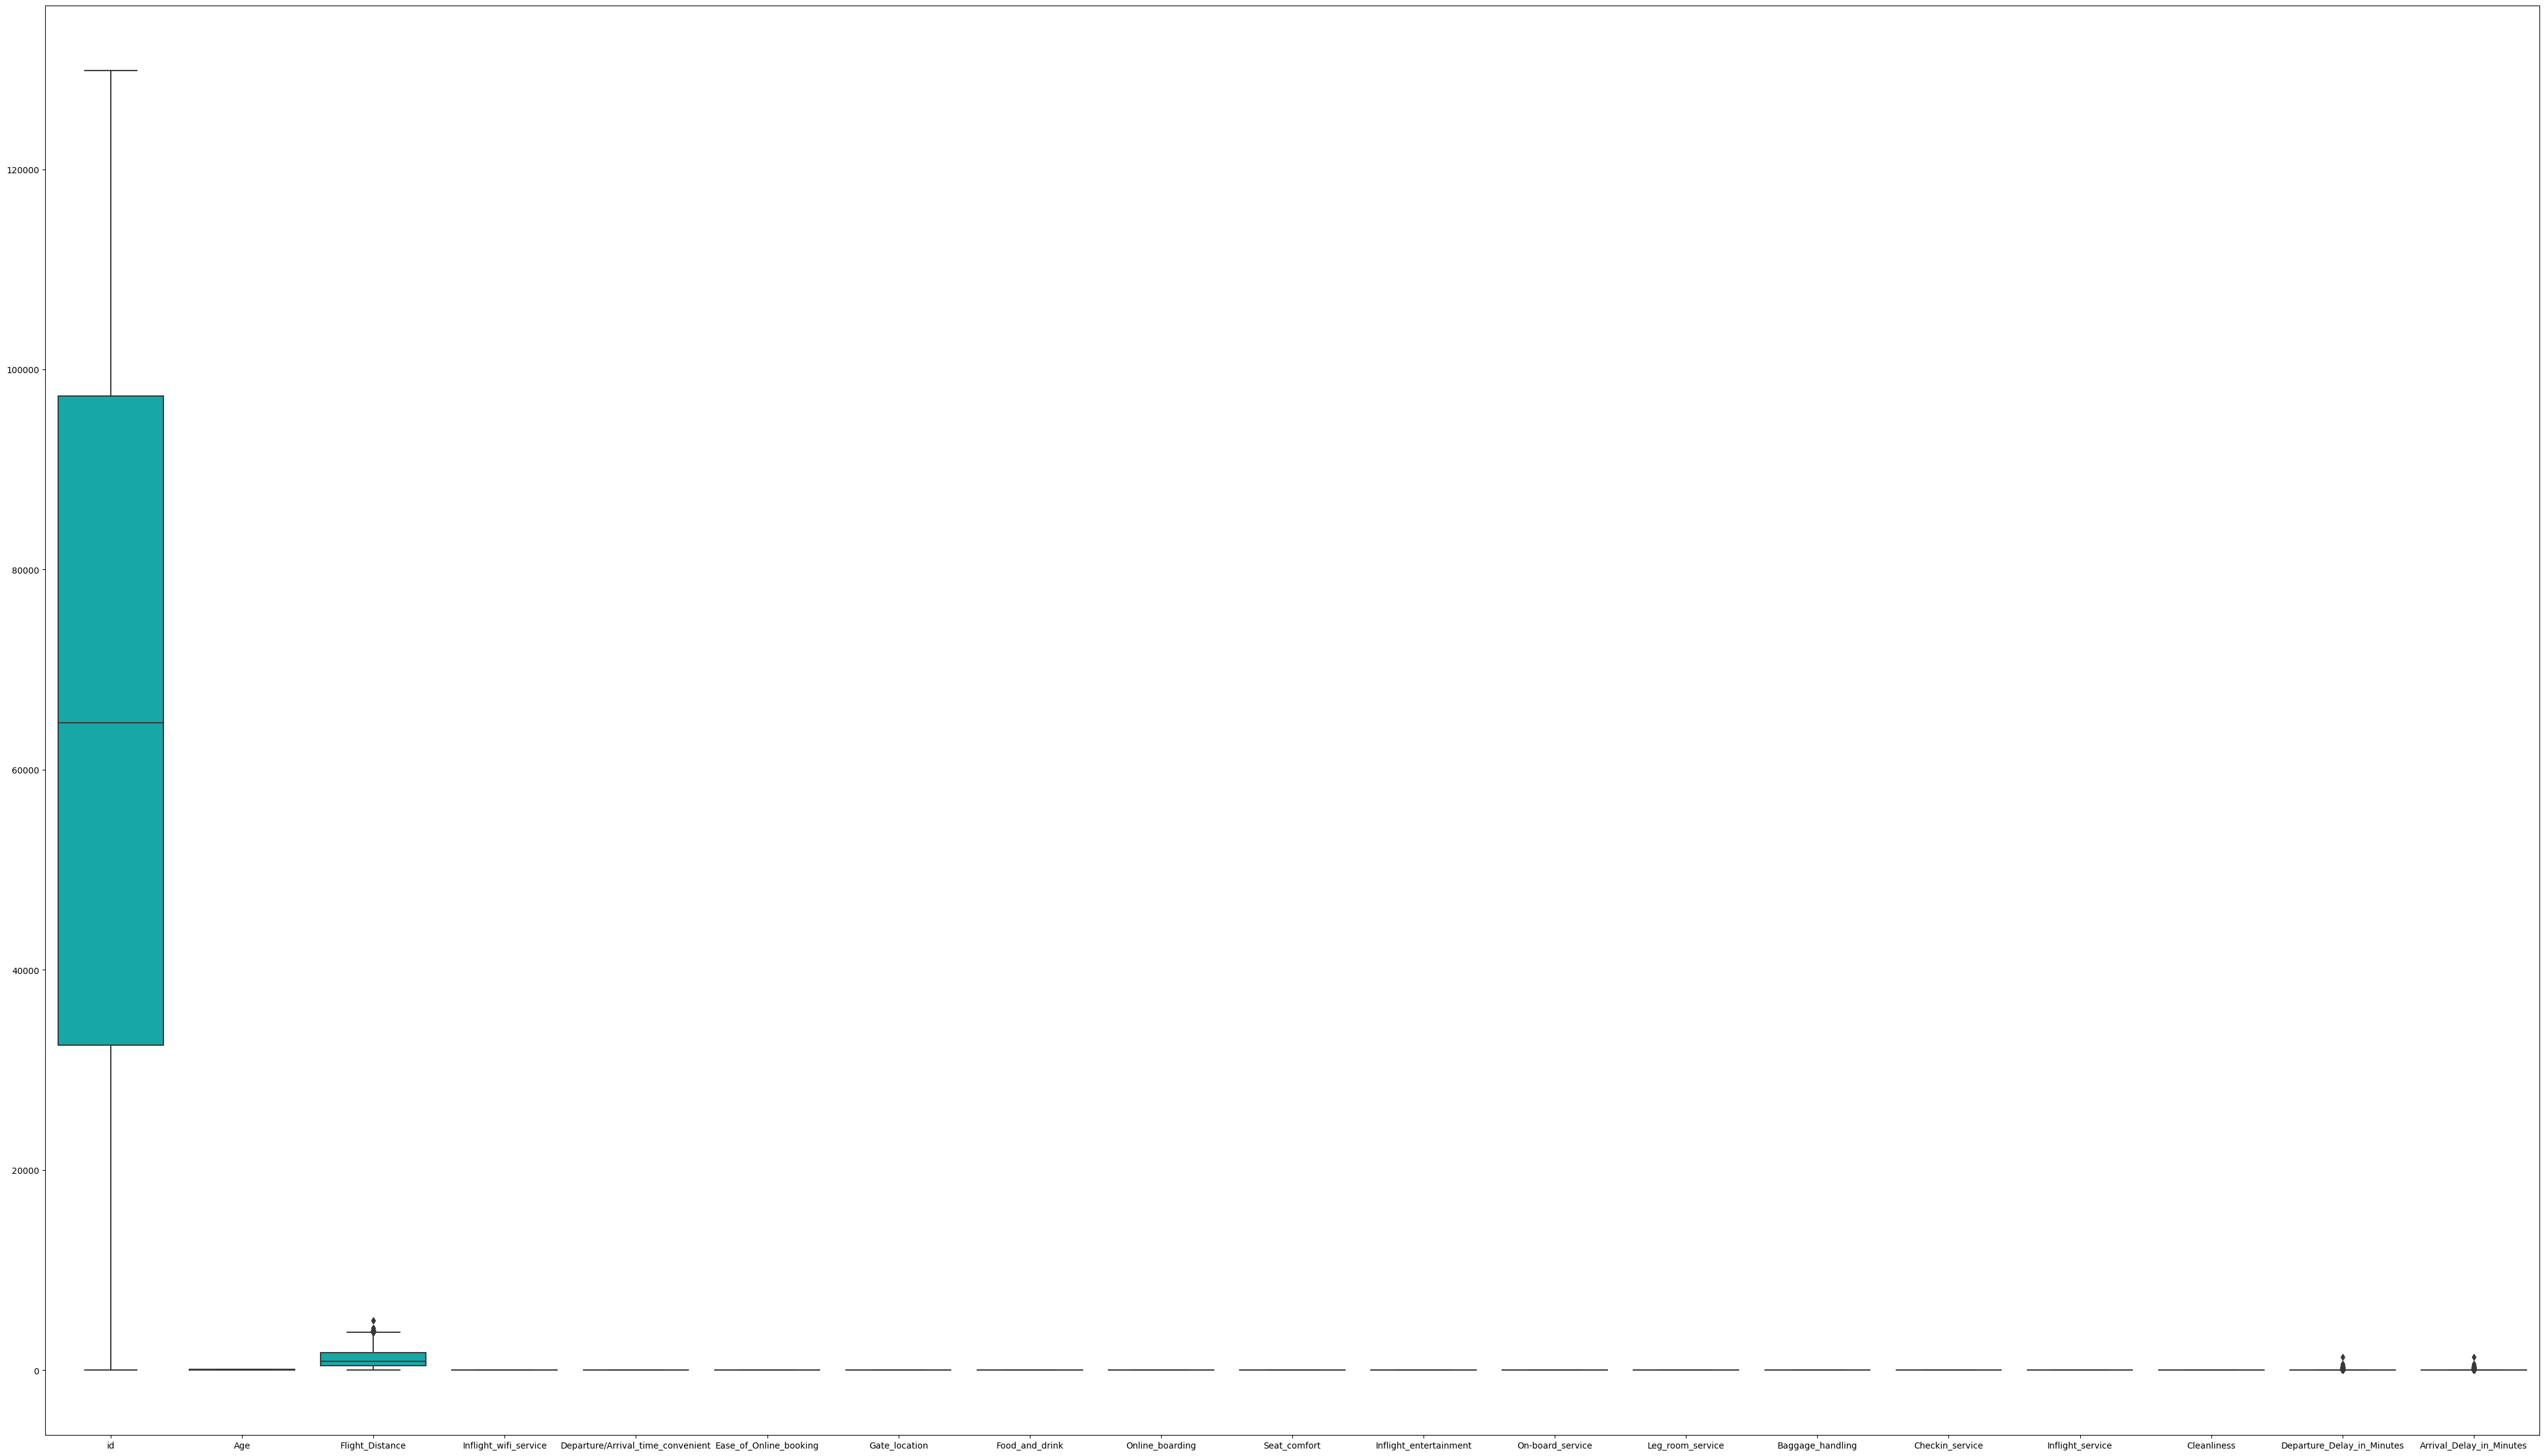

In [15]:
plt.figure(figsize=(52,30) ) # univariate box plot
sns.boxplot(df,color='c')
plt.show()

<Axes: xlabel='Arrival_Delay_in_Minutes'>

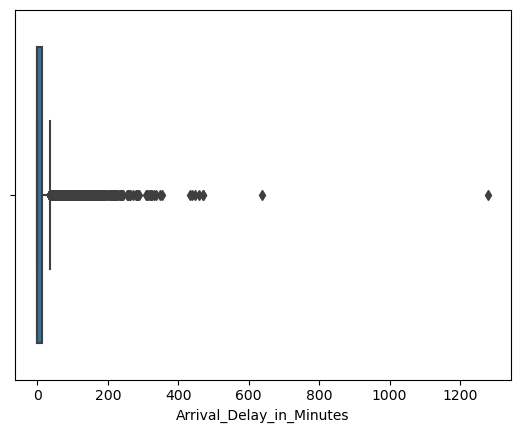

In [16]:
#checking outliers for label column
sns.boxplot(x=df['Arrival_Delay_in_Minutes'])

C:\Users\Manish\AppData\Local\Temp\ipykernel_18988\3149732765.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Class', y='satisfaction', data=df, ci=None, errorbar=None)
C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


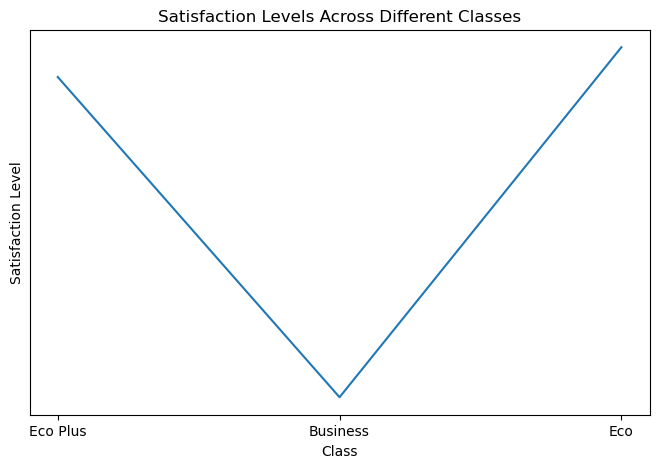

In [17]:
#line plot for satisfaction levels across different classes
plt.figure(figsize=(8, 5))
sns.lineplot(x='Class', y='satisfaction', data=df, ci=None, errorbar=None)  
plt.title('Satisfaction Levels Across Different Classes')
plt.xlabel('Class')
plt.ylabel('Satisfaction Level')
plt.show()

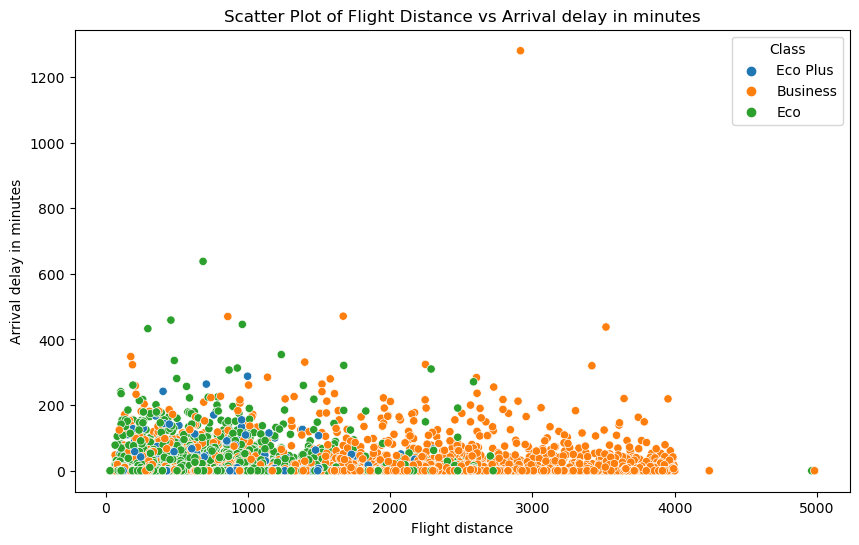

In [18]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight_Distance', y='Arrival_Delay_in_Minutes', hue='Class', data=df)
plt.title('Scatter Plot of Flight Distance vs Arrival delay in minutes')
plt.xlabel('Flight distance')
plt.ylabel('Arrival delay in minutes')
plt.legend(title='Class')
plt.show()

# Data Pre-processing

In [19]:
# dropping some non-required columns  
df= df.drop(columns=['id','Inflight_wifi_service','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding',
                       'Seat_comfort','Inflight_entertainment','On-board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness'])
df               

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,4,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,2,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,5,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...
8808,Female,Loyal Customer,25,Business travel,Business,3716,5,0,0.0,satisfied
8809,Male,Loyal Customer,25,Personal Travel,Eco,311,4,0,10.0,neutral or dissatisfied
8810,Female,Loyal Customer,25,Business travel,Eco,646,3,5,0.0,satisfied
8811,Female,Loyal Customer,42,Business travel,Business,3512,3,21,11.0,satisfied


In [20]:
df.shape  #now only 10 columns are left which are useful

(8813, 10)

In [21]:
#removing blank rows
df=df.dropna() 
df.shape

(8793, 10)

In [22]:
df_num = df.select_dtypes(include='number')
df_num.head() 

,Age,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,460,4,25,18.0
1,25,235,2,1,6.0
2,26,1142,2,0,0.0
3,25,562,5,11,9.0
4,61,214,3,0,0.0


In [23]:
# Outlier Filter-1
Q1= df_num.quantile(0.25)
Q3= df_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [24]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)] # removing the outliers

<Axes: xlabel='Arrival_Delay_in_Minutes'>

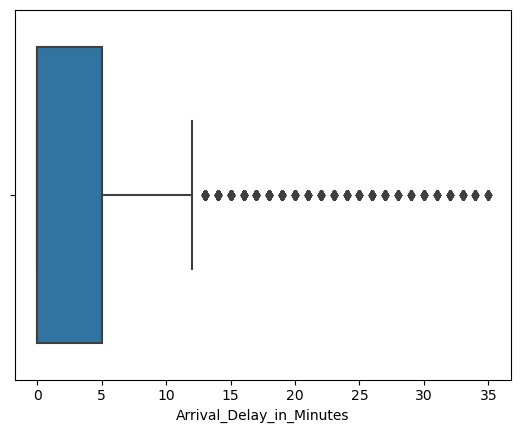

In [25]:
# now the outliers are reduced
sns.boxplot(x=df['Arrival_Delay_in_Minutes'])

In [26]:
X = df.drop('Arrival_Delay_in_Minutes', axis=1)
y = df.Arrival_Delay_in_Minutes
X.head() 

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,4,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,2,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,5,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,0,satisfied


In [27]:
X_num = X.select_dtypes('number')
X_num.head()

,Age,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes
0,13,460,4,25
1,25,235,2,1
2,26,1142,2,0
3,25,562,5,11
4,61,214,3,0


In [28]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [29]:
#performing scaling on numeical columns
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled

array([[0.07692308, 0.11510598, 0.8       , 0.78125   ],
       [0.23076923, 0.05473571, 0.4       , 0.03125   ],
       [0.24358974, 0.29809498, 0.4       , 0.        ],
       ...,
       [0.23076923, 0.07512745, 0.8       , 0.        ],
       [0.23076923, 0.16501207, 0.6       , 0.15625   ],
       [0.44871795, 0.93399517, 0.6       , 0.65625   ]])

In [30]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index) 

In [31]:
X_num_scaled

,Age,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes
0,0.076923,0.115106,0.8,0.78125
1,0.230769,0.054736,0.4,0.03125
2,0.243590,0.298095,0.4,0.00000
3,0.230769,0.142474,1.0,0.34375
4,0.692308,0.049101,0.6,0.00000
...,...,...,...,...
8806,0.038462,0.679903,0.6,0.18750
8808,0.230769,0.988731,1.0,0.00000
8809,0.230769,0.075127,0.8,0.00000
8810,0.230769,0.165012,0.6,0.15625


In [32]:
#performing one hot encoding on categorical data
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [33]:
X_cat_encoded.describe()

,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
count,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000
mean,0.510723,0.489277,0.816555,0.183445,0.686245,0.313755,0.476028,0.451031,0.072941,0.565633,0.434367
std,0.499919,0.499919,0.387057,0.387057,0.464050,0.464050,0.499459,0.497630,0.260057,0.495707,0.495707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [35]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((7321, 15), (7321, 4), (7321, 11))

In [36]:
print(X.isnull().sum()) 
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Age                                     0
Flight_Distance                         0
Departure/Arrival_time_convenient       0
Departure_Delay_in_Minutes              0
Gender_Female                           0
Gender_Male                             0
Customer_Type_Loyal Customer            0
Customer_Type_disloyal Customer         0
Type_of_Travel_Business travel          0
Type_of_Travel_Personal Travel          0
Class_Business                          0
Class_Eco                               0
Class_Eco Plus                          0
satisfaction_neutral or dissatisfied    0
satisfaction_satisfied                  0
dtype: int64
0
(7321, 15)
(7321,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print("X train:",X_train.shape)
print("X test:",X_test.shape)
print("Y train:",y_train.shape) 
print("Y test:",y_test.shape)

X train: (5124, 15)
X test: (2197, 15)
Y train: (5124,)
Y test: (2197,)


In [38]:
print(X_test.head())
print(y_test.head())

           Age  Flight_Distance  Departure/Arrival_time_convenient  \
6437  0.435897         0.314999                                1.0   
82    0.474359         0.439764                                0.6   
3978  0.230769         0.172525                                1.0   
1938  0.282051         0.137108                                0.6   
8119  0.487179         0.759860                                0.2   

      Departure_Delay_in_Minutes  Gender_Female  Gender_Male  \
6437                     0.00000              0            1   
82                       0.00000              1            0   
3978                     0.28125              1            0   
1938                     0.00000              1            0   
8119                     0.25000              1            0   

      Customer_Type_Loyal Customer  Customer_Type_disloyal Customer  \
6437                             1                                0   
82                               0                  

# We are ready to fit ML Model to train and evaluate using test

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from math import sqrt

In [57]:
# Initialize the KNN Regressor
k_neighbors = 5  
model = KNeighborsRegressor(n_neighbors=k_neighbors)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 39.523586709148844


In [60]:
# number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# cross-validation results
print(f'Cross-Validation Mean Squared Error: {-cross_val_results.mean()}')

Cross-Validation Mean Squared Error: 40.99239883250341


In [63]:
# predictions for each fold
for i, fold_predictions in enumerate(predictions):
    print(f'Predictions for Fold {i+1}: {fold_predictions}')

Predictions for Fold 1: 1.2
Predictions for Fold 2: 0.4
Predictions for Fold 3: 2.2
Predictions for Fold 4: 0.0
Predictions for Fold 5: 4.6
Predictions for Fold 6: 0.4
Predictions for Fold 7: 0.6
Predictions for Fold 8: 13.0
Predictions for Fold 9: 2.4
Predictions for Fold 10: 18.6
Predictions for Fold 11: 14.0
Predictions for Fold 12: 4.4
Predictions for Fold 13: 3.0
Predictions for Fold 14: 1.2
Predictions for Fold 15: 6.2
Predictions for Fold 16: 2.2
Predictions for Fold 17: 2.0
Predictions for Fold 18: 3.8
Predictions for Fold 19: 1.6
Predictions for Fold 20: 0.0
Predictions for Fold 21: 1.4
Predictions for Fold 22: 4.4
Predictions for Fold 23: 2.2
Predictions for Fold 24: 0.6
Predictions for Fold 25: 5.8
Predictions for Fold 26: 0.0
Predictions for Fold 27: 3.4
Predictions for Fold 28: 0.6
Predictions for Fold 29: 4.8
Predictions for Fold 30: 20.4
Predictions for Fold 31: 0.0
Predictions for Fold 32: 2.2
Predictions for Fold 33: 1.0
Predictions for Fold 34: 1.2
Predictions for Fol

In [66]:
# Define a range of k values to test
k_values = list(range(1, 7))  # You can adjust the range based on your preference

# Initialize variables to store results
cv_results = []

# Choose the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation for each k
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    cv_results.append((-scores.mean(), k))  # Negative because cross_val_score returns negative MSE

# Find the best k value based on the lowest negative MSE
best_k = min(cv_results)[1]

print(f'The best value of k is: {best_k}')

The best value of k is: 6


In [71]:
#puttong best value of k=6 to review
k_neighbors = 6  
model = KNeighborsRegressor(n_neighbors=k_neighbors)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 38.90373236231225
